In [59]:
from sqlalchemy import create_engine
import pandas as pd
from decouple import config

DATABASE_URL = config('DATABASE_URL')
engine = create_engine(DATABASE_URL)

ImportError: cannot import name 'config' from 'decouple' (/usr/local/lib/python3.9/site-packages/decouple/__init__.py)

In [2]:
df = pd.read_sql_query('select * from "shoes"',con=engine)

In [3]:
df

,id,name,price,free_shipping,total_images,seller_rating,url,model,shoe_size,adult_shoe,youth_shoe,child_shoe,sold,item_description,item_offer_info,item_bid_info,desc_fre_score,desc_avg_grade_score,sold_date
0,1224,Details about Sacai x KAWS x Nike Blazer Low...,170.00,False,6,32,https://www.ebay.com/itm/175050561094?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,True,sacai x kaws x nike blazer low red size brand ...,None,None,100,6,2021-12-05
1,1225,Details about Nike Blazer Low x sacai x KAWS...,180.00,True,13,8,https://www.ebay.com/itm/194546871771?hash=ite...,Sacai x KAWS x Nike Blazer Low,8.0,True,False,False,True,nike blazer low x sacai x kaws team red chitos...,None,None,-29,40,2021-12-05
2,1226,Details about Size 13 Mens Nike KAWS x sacai...,195.00,False,2,20,https://www.ebay.com/itm/165214297323?hash=ite...,Sacai x KAWS x Nike Blazer Low,13.0,True,False,False,True,size men nike kaws x sacai x blazer low team,None,None,104,4,2021-12-05
3,1227,Details about Sacai x KAWS x Nike Blazer Low...,187.00,False,2,8,https://www.ebay.com/itm/165212102183?hash=ite...,Sacai x KAWS x Nike Blazer Low,9.0,True,False,False,True,sacai x kaws x nike blazer low red size new box,None,None,103,4,2021-12-05
4,1228,Details about Sacai x KAWS x Nike Blazer Low...,199.00,True,8,689,https://www.ebay.com/itm/133953233635?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,True,brand new box free shipping please let know qu...,None,None,86,7,2021-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1502,sacai kaws nike blazer low red dm size,210.00,False,8,78,https://www.ebay.com/itm/224738124434?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.0,True,False,False,False,sacai x kaws x nike blazer low red size,True,False,105,3,NaT
314,1503,nike blazer low sacai kaws red size dm,190.00,False,7,7,https://www.ebay.com/itm/353786853897?hash=ite...,Sacai x KAWS x Nike Blazer Low,10.5,True,False,False,False,nike blazer low sacai kaws red size,True,False,107,4,NaT
315,1504,new nike kaws sacai blazer low team red dm uni...,209.99,False,7,382,https://www.ebay.com/itm/203750931981?hash=ite...,Sacai x KAWS x Nike Blazer Low,11.5,True,False,False,False,sale nike x sacai x kawsblazer lowteam red hot...,True,False,-7,33,NaT
316,1505,nike kaws sacai blazer low team red white dm s...,215.00,True,5,553,https://www.ebay.com/itm/304247927111?hash=ite...,Sacai x KAWS x Nike Blazer Low,11.5,True,False,False,False,nike x kaws x sacai blazer lowteam redsize new...,True,False,58,13,NaT


In [4]:
df = df.drop(columns=['id', 'name', 'item_description', 'item_offer_info', 'item_bid_info', 'model', 'url', 'sold_date'])

In [5]:
df

,price,free_shipping,total_images,seller_rating,shoe_size,adult_shoe,youth_shoe,child_shoe,sold,desc_fre_score,desc_avg_grade_score
0,170.00,False,6,32,10.0,True,False,False,True,100,6
1,180.00,True,13,8,8.0,True,False,False,True,-29,40
2,195.00,False,2,20,13.0,True,False,False,True,104,4
3,187.00,False,2,8,9.0,True,False,False,True,103,4
4,199.00,True,8,689,10.0,True,False,False,True,86,7
...,...,...,...,...,...,...,...,...,...,...,...
313,210.00,False,8,78,10.0,True,False,False,False,105,3
314,190.00,False,7,7,10.5,True,False,False,False,107,4
315,209.99,False,7,382,11.5,True,False,False,False,-7,33
316,215.00,True,5,553,11.5,True,False,False,False,58,13


In [6]:
df = df.drop(columns=['adult_shoe', 'youth_shoe', 'child_shoe'])

In [7]:
df["free_shipping"] = df["free_shipping"].astype(int)
df["sold"] = df["sold"].astype(int)

In [8]:
df

,price,free_shipping,total_images,seller_rating,shoe_size,sold,desc_fre_score,desc_avg_grade_score
0,170.00,0,6,32,10.0,1,100,6
1,180.00,1,13,8,8.0,1,-29,40
2,195.00,0,2,20,13.0,1,104,4
3,187.00,0,2,8,9.0,1,103,4
4,199.00,1,8,689,10.0,1,86,7
...,...,...,...,...,...,...,...,...
313,210.00,0,8,78,10.0,0,105,3
314,190.00,0,7,7,10.5,0,107,4
315,209.99,0,7,382,11.5,0,-7,33
316,215.00,1,5,553,11.5,0,58,13


### Filling Missing Values with the Average

In [9]:
price_fillna_value = round(df["price"].mean(),2)
free_shipping_fillna_value = int(df["free_shipping"].mean())
total_images_fillna_value = int(df["total_images"].mean())
seller_rating_fillna_value = int(df["seller_rating"].mean())
shoe_size_fillna_value = int(df["shoe_size"].mean())

df["price"].fillna(price_fillna_value,inplace=True)
df["free_shipping"].fillna(free_shipping_fillna_value,inplace=True)
df["total_images"].fillna(total_images_fillna_value,inplace=True)
df["seller_rating"].fillna(seller_rating_fillna_value,inplace=True)
df["shoe_size"].fillna(shoe_size_fillna_value,inplace=True)

df

,price,free_shipping,total_images,seller_rating,shoe_size,sold,desc_fre_score,desc_avg_grade_score
0,170.00,0,6,32,10.0,1,100,6
1,180.00,1,13,8,8.0,1,-29,40
2,195.00,0,2,20,13.0,1,104,4
3,187.00,0,2,8,9.0,1,103,4
4,199.00,1,8,689,10.0,1,86,7
...,...,...,...,...,...,...,...,...
313,210.00,0,8,78,10.0,0,105,3
314,190.00,0,7,7,10.5,0,107,4
315,209.99,0,7,382,11.5,0,-7,33
316,215.00,1,5,553,11.5,0,58,13


## Regression (Output variable: selling price / sold price)

### Define Input and Output Variables

In [44]:
X_regression = df[['free_shipping', 'total_images', 'seller_rating', 'shoe_size', 'sold', 'desc_fre_score', 'desc_avg_grade_score']]
y_regression = df['price']

### Linear Regression

Feature: 0, Score: 12.60688
Feature: 1, Score: -0.68393
Feature: 2, Score: 0.00035
Feature: 3, Score: 0.99160
Feature: 4, Score: -3.87757
Feature: 5, Score: -0.23268
Feature: 6, Score: 0.12856


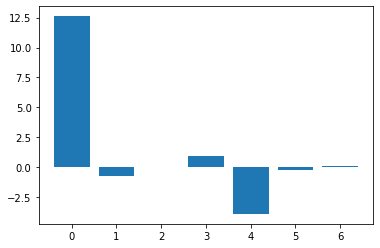

In [45]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = LinearRegression()
model.fit(X_regression, y_regression)
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest Regression

Feature: 0, Score: 0.04075
Feature: 1, Score: 0.08586
Feature: 2, Score: 0.27533
Feature: 3, Score: 0.10229
Feature: 4, Score: 0.02410
Feature: 5, Score: 0.17933
Feature: 6, Score: 0.29233


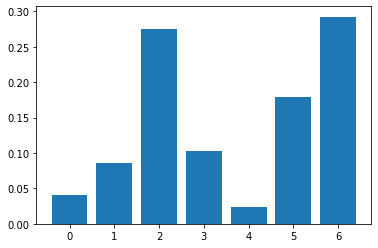

In [46]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_regression, y_regression)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### CART Regression

Feature: 0, Score: 0.02880
Feature: 1, Score: 0.05337
Feature: 2, Score: 0.46152
Feature: 3, Score: 0.04960
Feature: 4, Score: 0.01042
Feature: 5, Score: 0.06612
Feature: 6, Score: 0.33017


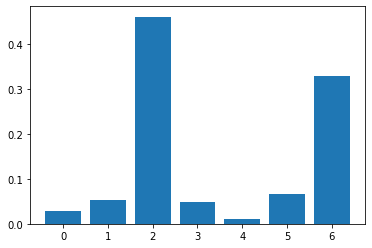

In [47]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_regression, y_regression)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [48]:
### XGBoost Regression 

Feature: 0, Score: 0.10781
Feature: 1, Score: 0.09536
Feature: 2, Score: 0.11621
Feature: 3, Score: 0.12849
Feature: 4, Score: 0.06331
Feature: 5, Score: 0.28781
Feature: 6, Score: 0.20102


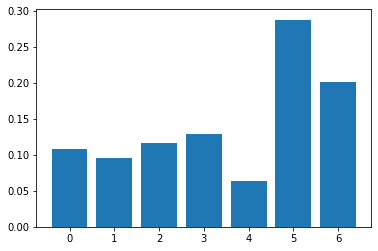

In [51]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_regression, y_regression)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Classification (Output variable: whether the item has sold or not )

### Define variables

In [52]:
X_classification = df[['price','free_shipping', 'total_images', 'seller_rating', 'shoe_size', 'desc_fre_score', 'desc_avg_grade_score']]
y_classification = df['sold']

### Logistic Regression

Feature: 0, Score: -0.00256
Feature: 1, Score: 0.39618
Feature: 2, Score: -0.10819
Feature: 3, Score: -0.00020
Feature: 4, Score: 0.04403
Feature: 5, Score: -0.00536
Feature: 6, Score: 0.00300


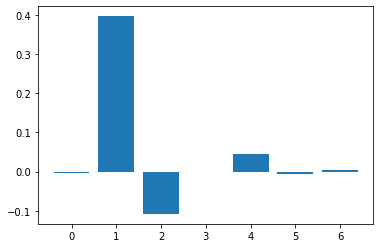

In [53]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_classification, y_classification)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest Classification

Feature: 0, Score: 0.16193
Feature: 1, Score: 0.03590
Feature: 2, Score: 0.16081
Feature: 3, Score: 0.19099
Feature: 4, Score: 0.14039
Feature: 5, Score: 0.18046
Feature: 6, Score: 0.12953


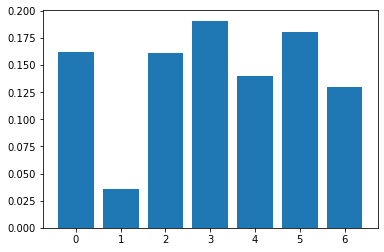

In [54]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_classification, y_classification)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### CART Classification

Feature: 0, Score: 0.25988
Feature: 1, Score: 0.02425
Feature: 2, Score: 0.13978
Feature: 3, Score: 0.19014
Feature: 4, Score: 0.06776
Feature: 5, Score: 0.18641
Feature: 6, Score: 0.13178


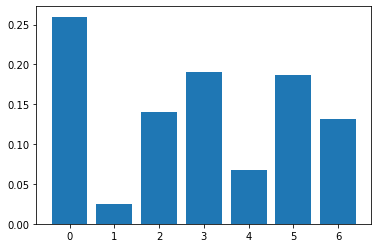

In [55]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_classification, y_classification)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### XGBoost Classification

[10:17:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.16544
Feature: 1, Score: 0.17995
Feature: 2, Score: 0.18636
Feature: 3, Score: 0.09819
Feature: 4, Score: 0.13676
Feature: 5, Score: 0.12997
Feature: 6, Score: 0.10332


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


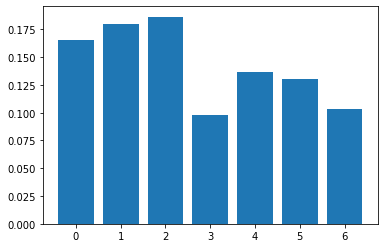

In [57]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(X_classification, y_classification)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()